# INFORME FINAL DE LA CARRERA #

Como modificación a mis proyectos anteriores decidí continuar investigando y analizando que sucede con otros peajes de la Capital Federal y si presentan distintas tendencias y flujo vehicular. Me llamo la atención en uno de mis últimos análisis el poco flujo vehicular por el peajeRetiro y mi es objetivo es analizar si un nuevo modelo predictivo en un peaje de menor flujo mejora los resultados con respecto al trabajo original y aplicar un nuevo modelo comparativo.

<img src="1.png">

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [6]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

In [7]:
# Unimos los 3 datasets, tienen las mismas columnas por eso se pueden concatenar
# Dejamos afuera el año 2020 por ser un año atípico, y el 2016 lo utilizaré mas adelante
# para ver si mi modelo mejora al agregar mas datos. 

dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Retiro y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Retiro', dataset.forma_pago == 'EFECTIVO')
dataset_re = dataset [mask]

#Quitamos las columnas que no vamos a utilizar
dataset_re.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_re['fecha2'] = pd.to_datetime(dataset_re.fecha) + pd.to_timedelta(dataset_re.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_re.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha 
dataset_re.rename(columns = {'fecha2':'fecha'}, inplace = True)

#Reordenamos el dataset por fecha
dataset_re.sort_values('fecha', inplace = True)
dataset_re.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
dataset_re = dataset_re.resample('D', on = 'fecha').sum()

In [8]:
dataset_re.head()

,cantidad_pasos
fecha,
2017-01-01,1684
2017-01-02,4448
2017-01-03,4610
2017-01-04,4751
2017-01-05,4982


In [9]:
data_2019.estacion.replace({'Alberti':'Alberdi'},inplace=True)

In [10]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


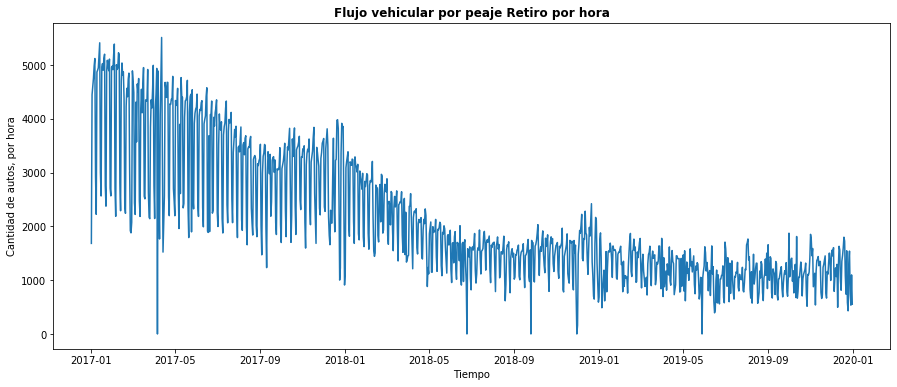

In [12]:
plt.figure(figsize = (15,6))
plt.plot(dataset_re.index, dataset_re.cantidad_pasos)
plt.title ('Flujo vehicular por peaje Retiro por hora',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

*Fig. 1 : Flujo vehicular por el peaje Retiro donde se observa una disminución de la tendencia similar a lo que sucede en los otros peajes.*

In [13]:
# Vemos que sucede con el Telepase
dataset = pd.concat([data_2019, data_2018, data_2017])

# Nos quedamos solamente con la estación Retiro y la forma de pago telepase
mask = np.logical_and(dataset.estacion=='Retiro', dataset.forma_pago == 'TELEPASE')
dataset_rete = dataset [mask]
dataset_rete.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset_rete['fecha2'] = pd.to_datetime(dataset_rete.fecha) + pd.to_timedelta(dataset_rete.hora_fin, unit = 'h')
dataset_rete.drop(columns=['fecha','hora_fin'], inplace = True)
dataset_rete.rename(columns = {'fecha2':'fecha'}, inplace = True)
dataset_rete.sort_values('fecha', inplace = True)
dataset_rete.reset_index(drop=True, inplace = True)
dataset_rete = dataset_rete.resample('D', on = 'fecha').sum()

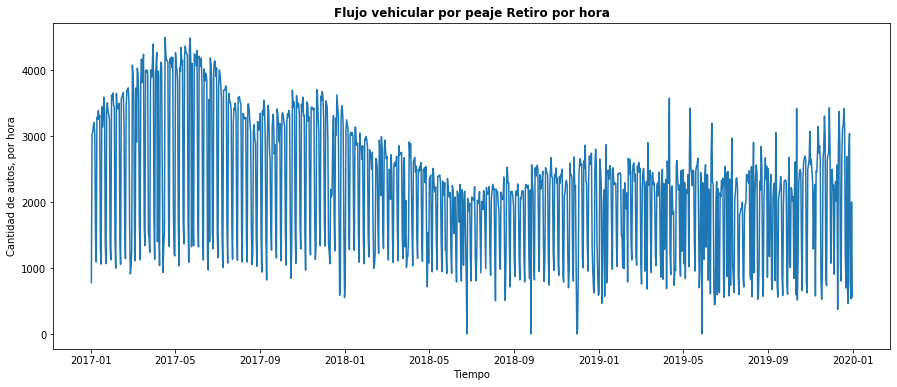

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_rete.index, dataset_rete.cantidad_pasos)
plt.title ('Flujo vehicular por peaje Retiro por hora',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

*Fig. 2 : Observamos como aumenta y se mantiene estable la tendencia al separar nuestros datos con forma de pago Telepase*

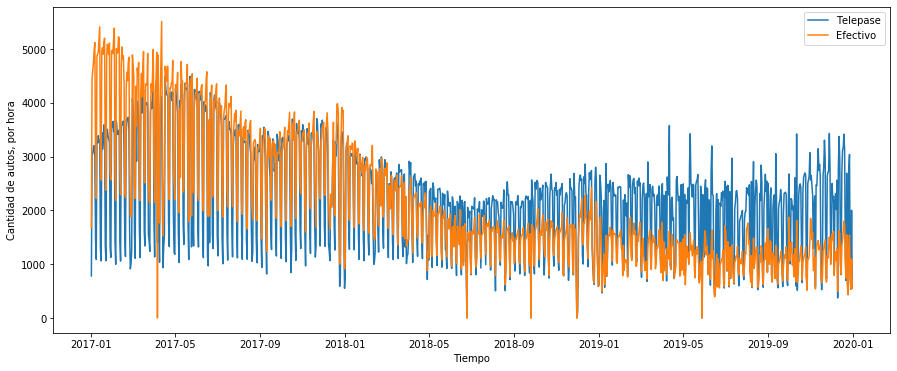

In [15]:
plt.figure(figsize = (15,6))
plt.plot(dataset_rete.index, dataset_rete.cantidad_pasos,label = 'Telepase')
plt.plot(dataset_re.index, dataset_re.cantidad_pasos, label = 'Efectivo')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.legend()
plt.show()

*Fig. 3 : Vemos que los cambios en las tendencias se deben, al igual que en el trabajo anterior, a la modificación en la forma de pago, cambiando de Efectivo a Telepase*

In [16]:
dataset_re.head()

,cantidad_pasos
fecha,
2017-01-01,1684
2017-01-02,4448
2017-01-03,4610
2017-01-04,4751
2017-01-05,4982


*Qué sucede si ahora utilizamos los datos de este peaje para predecir el flujo vehicular en 2019? Nuestro dataset ahora esta filtrado por un menor número de instancias (menor cantidad de pasos por este peaje) pero ademas tiene un único sentido (Provincia) y la mayoría de los vehículos son pesados por el propio flujo del peaje y por la zona en la que se ubica (cercano al puerto de Buenos Aires). Mejorará nuestro modelo ?*

In [17]:
look_back = 90*1 # usamos x días de datos para predecir el valor siguiente

In [18]:
N = dataset_re.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1004, 90) (1004,)


In [19]:
N-365-1

729

In [20]:
for i in range(X.shape[0]):
    X[i,:] = dataset_re.values[i:i+look_back].ravel()
    y[i] = dataset_re.values[i+look_back]

In [21]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*365 # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(364, 90) (364,)


In [22]:
N_total

1005

## Modelo Benchmark ##

In [23]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [24]:
y_test_pred_benchmark.shape

(365,)

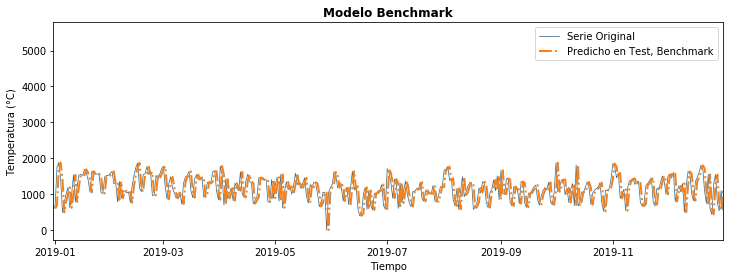

In [25]:
plt.figure(figsize=(12,4))
plt.plot(dataset_re.index[:length_total], dataset_re[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dataset_re.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(dataset_re.index[N_train+look_back-1], dataset_re.index[length_total-1])
plt.title ('Modelo Benchmark', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_test_pred_benchmark [:- 1])
print('Error en Test:',np.sqrt(MSE))

Error en Test: 389.38069312155704


## Modelo Random Forest ##

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [28]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [29]:
dataset_re.index[N_train+look_back: length_total].shape

(365,)

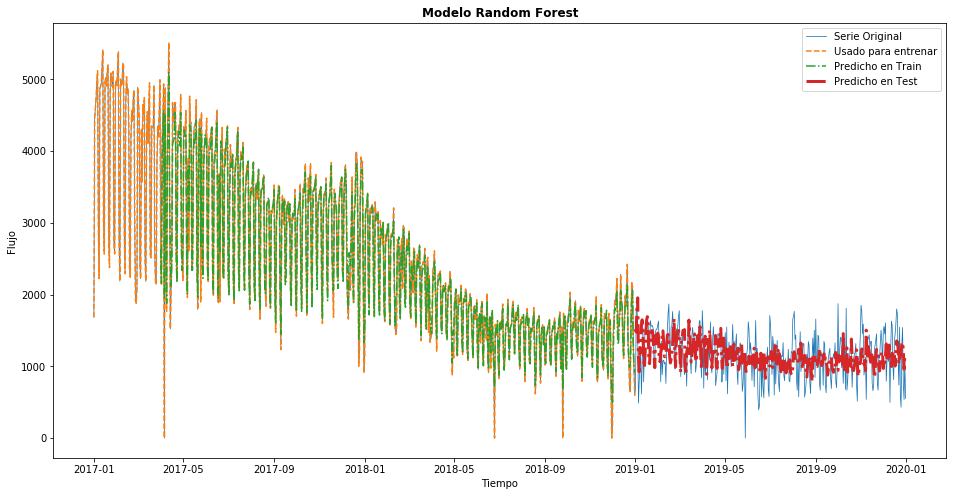

In [30]:
plt.figure(figsize=(16,8))
plt.plot(dataset_re.index[:length_total], dataset_re[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dataset_re.index[:N_train + look_back], dataset_re[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(dataset_re.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(dataset_re.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title ('Modelo Random Forest', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Fig. 4: Modelo predictivo de flujo vehicular utilizando el modelo Random Forest.

In [31]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 171.69369096045725
Error en Test: 329.06339021481915


Raíz del error cuadrático medio en Train: 171.69369096045725
Raíz del error cuadrático medio en Test: 329.06339021481915


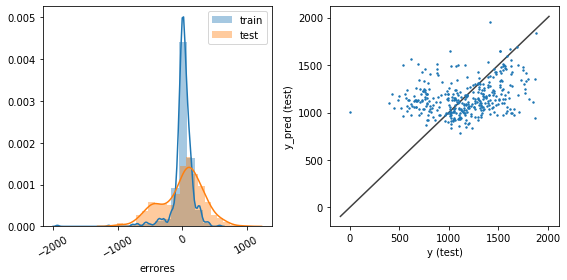

In [32]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

*Resultado Modelo Random Forest*

<img src="2.png">

***Como conclusión inicial podemos observar que la distribución de los errores de nuestros modelos comparativa al trabajo anterior sigue siendo similar, y que el filtrado de datos con una menor cantidad de instancias no mejora nuestro modelo***

In [33]:
# Agregamos los datos del año 2016, esperando que al aumentar el número de datos nuestro modelo mejore

dataset = pd.concat([data_2019, data_2018, data_2017, data_2016])

#Nos quedamos solamente con la estación Retiro y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Retiro', dataset.forma_pago == 'EFECTIVO')
dataset_re = dataset [mask]
dataset_re.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset_re['fecha2'] = pd.to_datetime(dataset_re.fecha) + pd.to_timedelta(dataset_re.hora_fin, unit = 'h')
dataset_re.drop(columns=['fecha','hora_fin'], inplace = True)
dataset_re.rename(columns = {'fecha2':'fecha'}, inplace = True)
dataset_re.sort_values('fecha', inplace = True)
dataset_re.reset_index(drop=True, inplace = True)
dataset_re = dataset_re.resample('D', on = 'fecha').sum()

In [34]:
look_back = 90*1 # usamos x días de datos para predecir el valor siguiente

In [35]:
N = dataset_re.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1370, 90) (1370,)


In [36]:
N-365-1

1095

In [37]:
for i in range(X.shape[0]):
    X[i,:] = dataset_re.values[i:i+look_back].ravel()
    y[i] = dataset_re.values[i+look_back]

In [38]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*365 # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(365, 90) (365,)


In [39]:
N_total

1005

## Modelo Benchmark con datos año 2016 ##

In [40]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [41]:
y_test_pred_benchmark.shape

(365,)

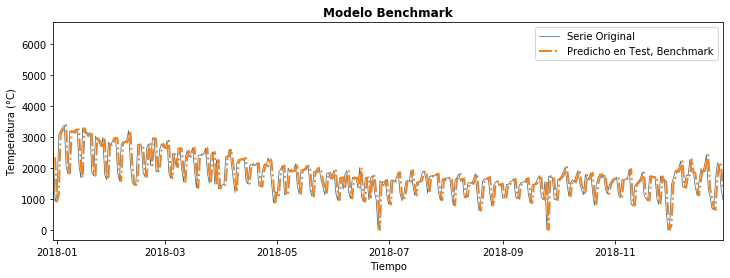

In [42]:
plt.figure(figsize=(12,4))
plt.plot(dataset_re.index[:length_total], dataset_re[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dataset_re.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(dataset_re.index[N_train+look_back-1], dataset_re.index[length_total-1])
plt.title ('Modelo Benchmark', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_test_pred_benchmark) # [:- 1])
print('Error en Test:',np.sqrt(MSE))

Error en Test: 510.50848945753995


***Al agregar mas datos a nuestro modelo, vemos que el resultado del benchmark no mejora, sino que empeora a casi el doble del RMSE. No siempre el agregar mas datos mejora el rendimiento de nuestro modelos.***

## Modelo Random Forest con el año 2016

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [45]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [46]:
dataset_re.index[N_train+look_back: length_total].shape

(365,)

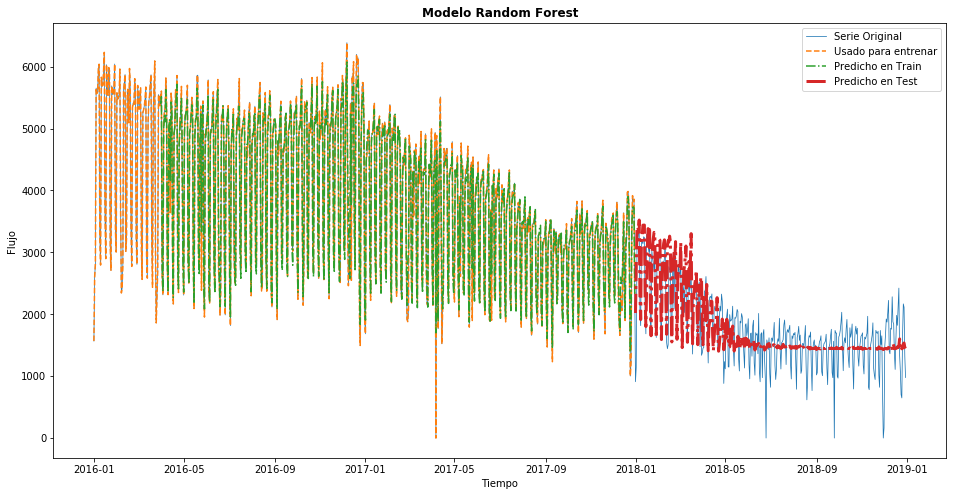

In [47]:
plt.figure(figsize=(16,8))
plt.plot(dataset_re.index[:length_total], dataset_re[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dataset_re.index[:N_train + look_back], dataset_re[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(dataset_re.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(dataset_re.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title ('Modelo Random Forest', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

*Fig. 5: Modelo predictivo de flujo vehicular utilizando el modelo Random Forest con los datos del año 2016. Se observa que mantiene la tendencia pero los errores aumentan a medida que va pasando el tiempo.*

In [48]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 211.37173291938484
Error en Test: 406.03453293619293


## Que pasa si utilizamos otro modelo ?? ##
### Nuevo Modelo de análisis SVM ###

In [49]:
# Se realiza el fit del modelo
from sklearn.svm import SVR

rgs = SVR(kernel='rbf')
rgs.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
# Se realizan las predicciones sobre los datos de prueba
y_pred = rgs.predict(X_test)

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse}')

Raíz del error cuadrático medio en Train: 2171.5645642078466


Raíz del error cuadrático medio en Train: 1218.9980535399995
Raíz del error cuadrático medio en Test: 2171.5645642078466


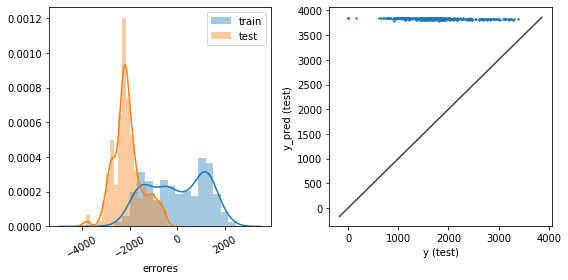

In [52]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rgs.predict(X_train)
y_test_pred = rgs.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [53]:
# Utilizamos el GridSearch para encontrar nuestro mejor hiperparámetro

from sklearn.model_selection import GridSearchCV 
  
# Definimos el rango de parametros
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# Fitiamos el modelo para el grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.329, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.409, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.092, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.345, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-4.227, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.329, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.409, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.092, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.345, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-4.227, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.329, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [54]:
# Imprimimos los mejores parámetros después de tunear nuestro modelo
print(grid.best_params_) 
  
# Imprimimos como queda nuestro modelo después del tuneo de hiperparámetros 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [55]:
rgs_gs = SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
rgs_gs.fit(X_train, y_train)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
y_pred = rgs_gs.predict(X_test)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse}')

Raíz del error cuadrático medio en Train: 2174.8456593010965


Raíz del error cuadrático medio en Train: 1253.581512108407
Raíz del error cuadrático medio en Test: 2174.8456593010965


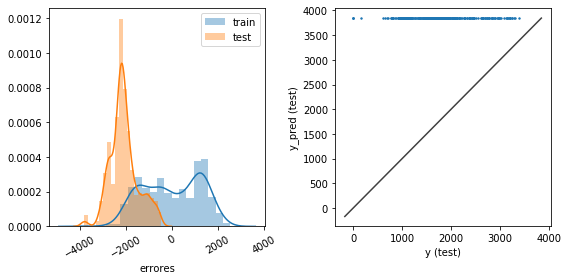

In [59]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rgs_gs.predict(X_train)
y_test_pred = rgs_gs.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

***Como observamos en nuestro resultado final, vemos que el SVM se comporta incluso peor que nuestro modelo benchmark. Si bien se realiza el GridSearch buscando los mejores hiper parámetros para el modelo, algo que es fundamental al aplicar SVM, el resultado no es bueno, observando el RMSE y la distribución de los errores.***